<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Euler's method

## Modules – Ordinary Differential Equations
<section class="post-meta">
By Niels Henrik Aase, Thorvald Ballestad and Jon Andreas Støvneng
</section>
Last edited: February 9th 2020

___
This notebook gives a more thorough walkthrough of the theoretical aspects of Euler's method as well as providing a slightly more advanced code than our other notebook on Euler's method, which focuses on the *[ implementation of Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/Eulers_method_-_implementation-_done.ipynb)*. We will illustrate how one can use this simple numerical method to solve higher order differential equations, as well as explaining the notions of instability and local and global truncation errors.
___

## Introduction

Solving differential equation is at the heart of both physics and mathematics. Ordinary differential equations, ODEs for short, appear in all kinds of problems in physics, whether it being Newtonian mechanics (where we try to find the equations of motion), electromagnetic theory, or quantum mechanics. However, more often than not, these ODEs do not have analytical solutions, and we have to solve them numerically. In this notebook we will give an extensive review of Euler's method, the simplest algorithm for solving ODEs. In contrast with our other notebook on Euler's method, *[ Simple implementation of Euler's method](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/Eulers_method_-_implementation-_done.ipynb)*, we will cover the algorithm quite thoroughly as we will show the derivation of the method, error estimates, and stability. Lastly, we will show how we can use Euler's method to solve higher order differential equations, by reducing them to a system of first order differential equations. 

Let's start by giving a concrete example on what kind of problem we wish to solve. Consider the first order differential equation 

\begin{equation}
\frac{d}{dt} y(t) = g(y(t), t),
\label{genODE}
\end{equation}
where $y(t)$ is the function we want to calculate, and $g(y(t), t)$ is a function that can depend on $y(t)$, but it also might have explicit time dependence. If we have the initial condition $y(0) = y_0$, how do we solve \eqref{genODE}? Analytically there exists a multitude of different schemes to solve these kinds of equations, all with their own limitations and areas of use. An example of this is the *[Integrating factor](https://en.wikipedia.org/wiki/Integrating_factor)*, which is a scheme that the reader might already be familiar with. However, all these analytical schemes depend on the __existence__ of an analytical solution. By solving equation \eqref{genODE} numerically we are not restricted to these kinds of ODEs, and thus we have opened a Pandora's box of new ODEs that we can solve!

## Theory

### Discretization

One of the downsides by using numerical schemes to solve ODEs is that we have to *discretize* our time variables. This means that the time variable $t$, only can take a set of predetermined discrete time values, called grid points, it is no longer a continuous variable. We define this set of possible time values to be on the form


$$
t_n = t_0 + nh, \quad \mathrm{with} \quad n = 0, 1, 2,..., N,
$$

where $t_0$ often the time value where we know our initial condition, and $h$ is the size between adjacent discrete time values. The relation between $N$ and $h$ is given by

\begin{equation}
h = \frac{t_N - t_0}{N},
\label{h&N}
\end{equation}

where $N + 1$ is the number of discrete time points we have in our simulation (where the + 1 appears due to our choice of zero-indexing) , while $t_N$ denote the largest time value we have in our simulation. You might think of $h$ as the coarseness of our time variable; the smaller $h$, the more grid points we need to cover the same time interval. For instance, if we want to discretize the interval $[0,1]$ such that we have grid points every 0.01 seconds, i.e. the distance between grid points is 0.01 (recall that this is our definition of $h$), we use equation \eqref{h&N}, to deduce that we need $N=100$. In general, our numerical approximation will be better if we choose a small $h$. Note as the size of $h$ decreases, the number of discrete time values between $t_0$ and $t_N$ increases. We pay for the increased level of precision by increasing the number of calculations needed, thus increasing the runtime of our program. It is highly encouraged to reflect over what the necessary coarseness of our discretized time variable before solving a problem.

### Euler's method

There are several ways to derive Euler's method. Here we present a proof which revolve around Taylor series, thus basic calculus is required to follow the proof. Any "nice" (We do not elaborate what this requires) function $y(t)$ can be written as

\begin{equation}
y(t) = \sum_{n=0}^{\infty} \frac{y^{(n)}(t_0)}{n!}(t-t_0)^n, = y(t_0) + \frac{y'(t_0)}{1!}(t-t_0) + \frac{y''(t_0)}{2!}(t-t_0)^2 + ...
\label{Taylor}
\end{equation}

where $t_0$ is an arbitrary value. We say that we expand $y(t)$ around $t_0$. Now we use Taylor's theorem and truncate the series at the first order

\begin{equation}
y(t_0 + h) = y(t_0) + \frac{y'(t_0)}{1!}h + \frac{1}{2!}h^2 y''(\tau),
\label{Taylor_trunc}
\end{equation}

for some $\tau \in [t_0, t_0 + h]$. Reshuffling equation \eqref{Taylor_trunc}, and solving for $y'(t_0)$ we get

\begin{equation}
y'(t_0) = \frac{y(t_0 + h)- y(t_0)}{h} + \mathcal{O}(h), 
\label{deriv}
\end{equation}

where we use *[big O notation](https://en.wikipedia.org/wiki/Big_O_notation)*. Now we use the essential idea of Euler's method, from \eqref{genODE}, we know the exact expression of $y'(t_0)$ because we know that $y'(t) = g(y(t), t)$! Inserting this into \eqref{deriv} and solving for $y(t_0 + h)$ we get 

\begin{equation}
y(t_0 + h) = y(t_0) + h g(y(t_0), t_0) + \mathcal{O}(h^2).
\label{next_step}
\end{equation}

Thus, by equation \eqref{next_step} we have an estimate for what the value of $y$ is at our first grid point $t= t_0 + h$! By choosing $h$ small enough (and hoping that the $ \mathcal{O}$ term is not too large), our estimate will be quite precise. Neglecting the $ \mathcal{O}$ term, we write

\begin{equation}
y(t_0 + h) \approx y(t_0) + h g(y(t_0), t_0).
\label{next_step_ish}
\end{equation}


If we have our initial condition at $t_0$ and denote this value as $y_0$, we can use Euler's method to find an approximation of $y$ at $t_1 = t_0 +h$. $y$ at $t_1$ is denoted as $y_1$. This approximation can be calculated by the formula

$$
y_1 = y_0 + hg(y_0).
$$

Now, to find the population size $y_2$ at $t_2 = t_1 + h = t_0 + 2h$, we use the same formula, but with $y_1$ instead of $y_0$

$$
y_2 = y_1 + h g(y_1).
$$

The most general form of Euler's method is written as

\begin{equation}
y_{n+1} = y_n + h g(y_n).
\label{Euler}
\end{equation}

Now we will illustrate how to implement Euler's method by using the same example as in our *[Implementation of Euler's method notebook](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/Eulers_method_-_implementation-_done.ipynb)*. 

\begin{equation}
\frac{dy}{dt} = ky(t),
\label{ODE}
\end{equation}

where $k=\mathrm{ln}(2)$ and $y(0) = 1$. In the previous notebook we said that $y(t)$ was the population size of a bacterial colony at time $t$, and we repeat the notation here. We can solve equation \eqref{ODE} analytically to obtain $y(t) = 2^t$, so we have something to compare our numerical results to.


In [4]:
# Importing the necessary libraries
import numpy as np # NumPy is used to generate arrays and to perform some mathematical operations
import matplotlib.pyplot as plt # Used for plotting results

# Updating figure params
newparams = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)


In [5]:
def step_Euler(y, h, f):
    """Performs a single step of Euler's method.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    next_y = y + h * f(y)
    return next_y


def full_Euler(h, f, y_0 = 1, start_t = 0, end_t = 1):
    """ A full numerical aproximation of an ODE in a set time interval. Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE
    
    Parameters:
            h: Step size
            f: RHS of our ODE
            y_0 : Initial condition for y at t = start_t
            start_t : The time at the initial condtion, t_0
            end_t : The end of the interval where the Euler method is perfomed, t_N
        Returns:
            y_list: Numerical approximation of y at times t_list
            t_list: Evenly spaced discrete list of time with spacing h. 
                    Starting time = start_t, and end time = end_t 
    """
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N Euler_steps
    for i in range(0, N):
        y_list[i + 1] = step_Euler(y_list[i], h, f)
    return y_list, t_list 

Now that we have our functions defined, we only need to define our RHS (Right hand side) of our differential equation, which we in the theory part denoted as $g(y)$.




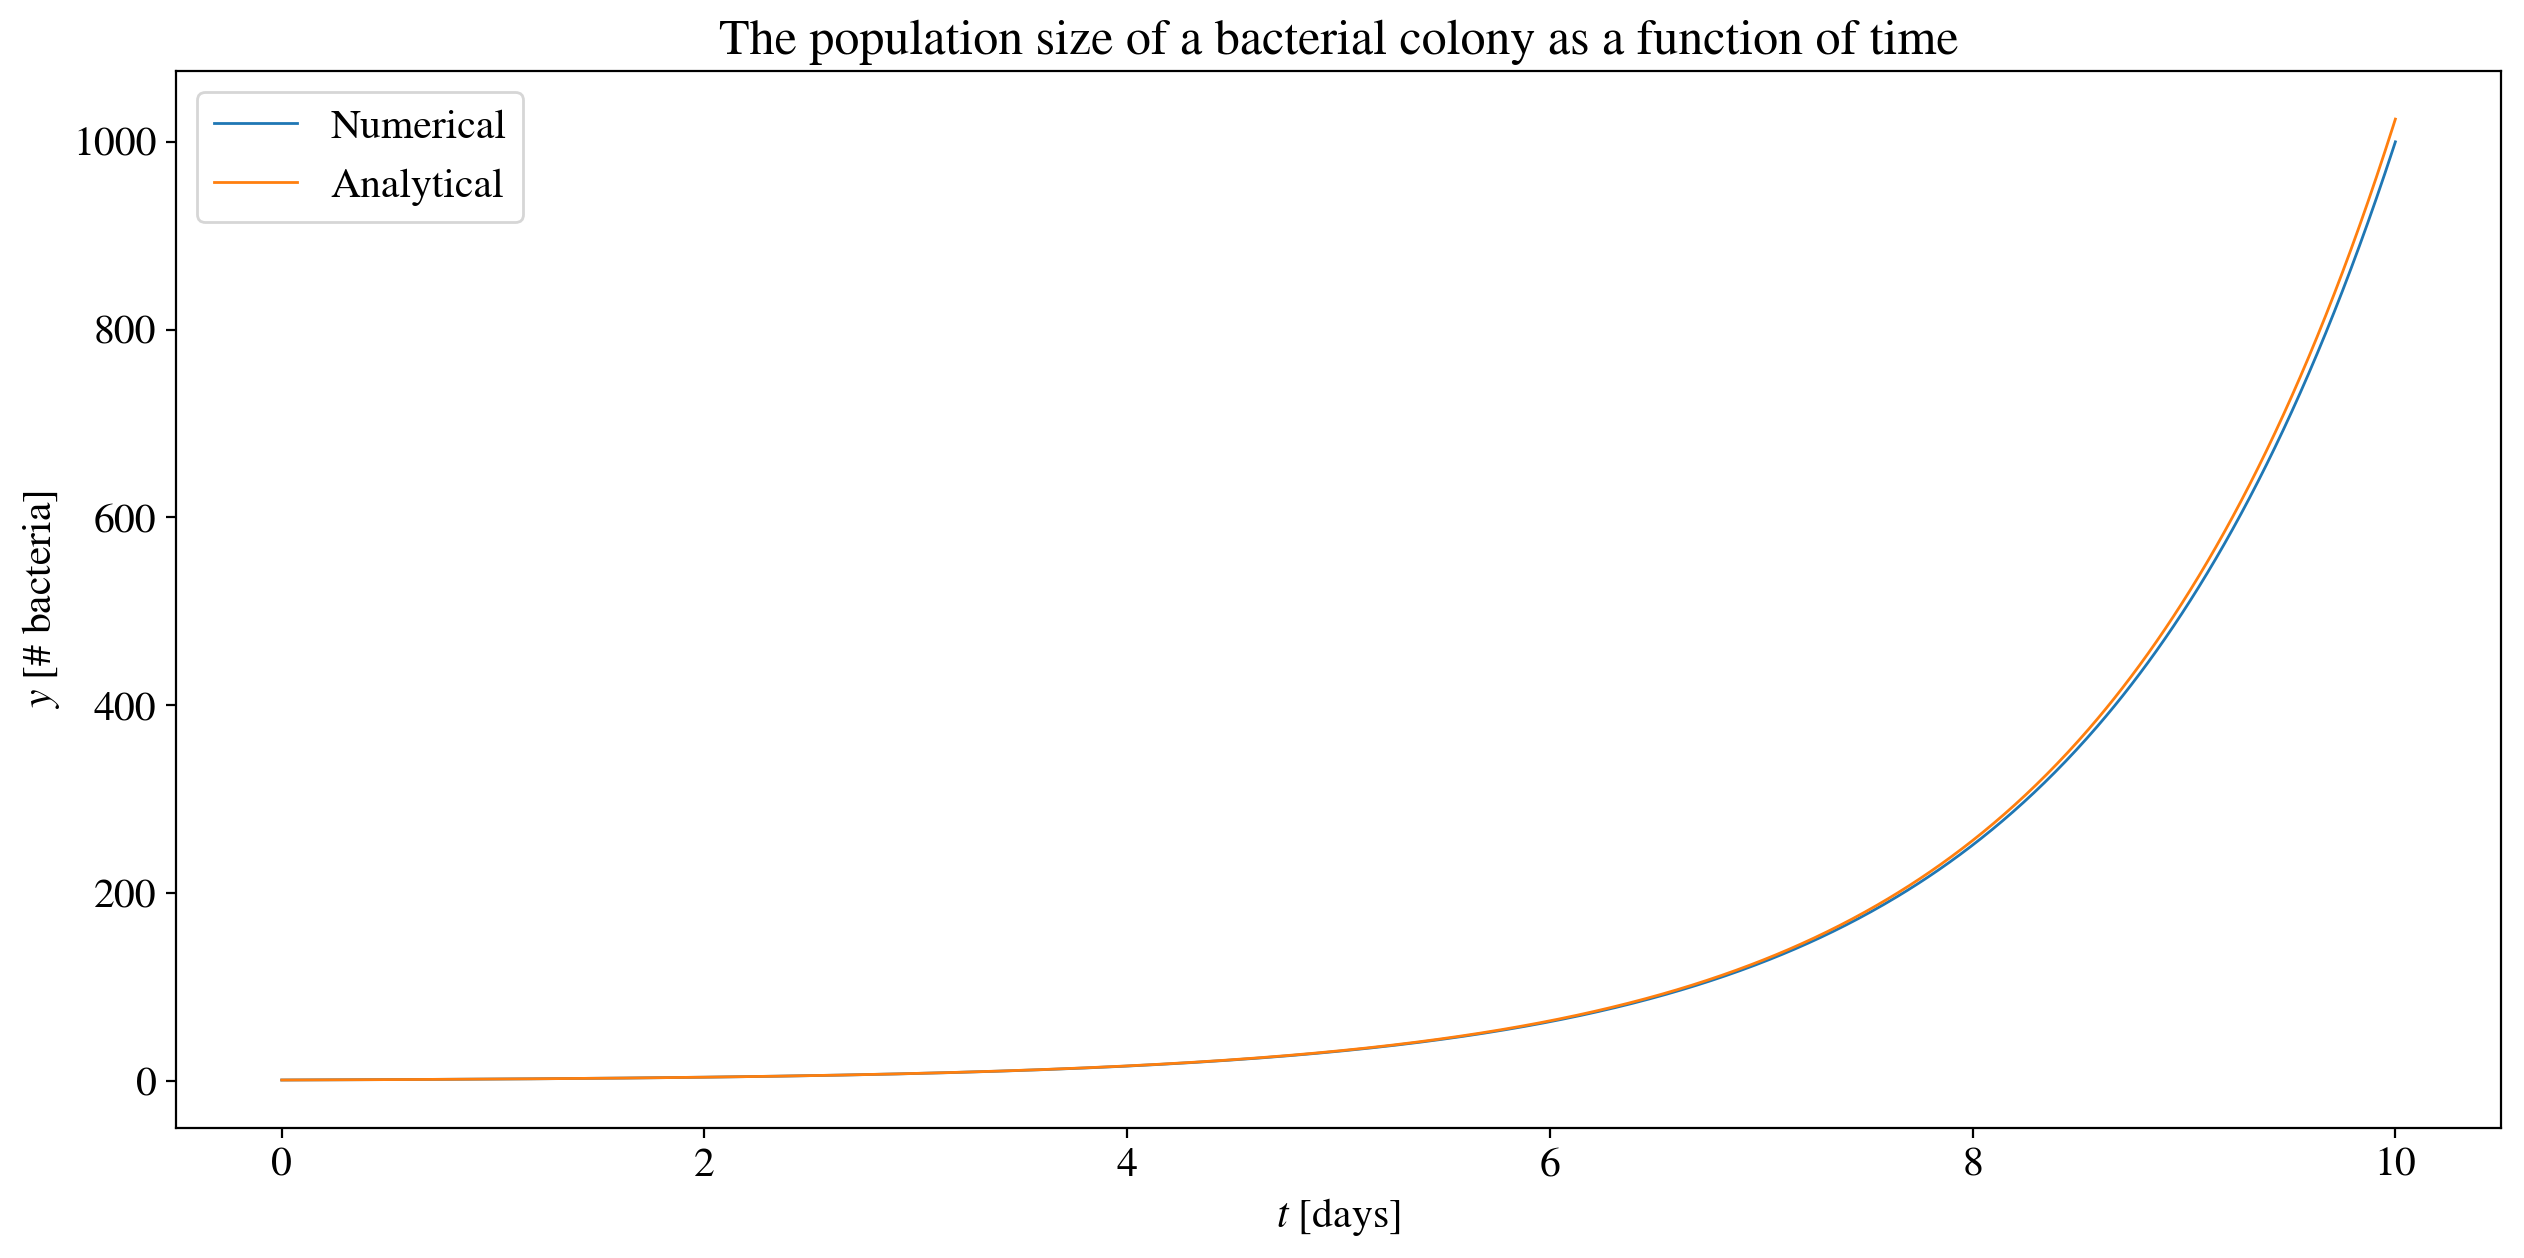

After 10 days, our numerical approximation of bacterias is off by: 24.20


In [6]:
def g(y):
    """Defines the right hand side of our differential equation. In our case of bacterial growth, g(y) = k*y
    
    Parameters:
            y: Numerical approximation of y at time t
        Returns:
            growth_rate: Current population size multiplied with a constant of proportionality.
            In this case this is equal to ln(2)
    """
    growth_rate = np.log(2)*y
    return growth_rate

# Now we can find the the numerical results from Euler's method
# and compare them to the analytical solution

# Input parameters
y_0 = 1  # Initial population size, i.e. a single bacteria
h = 0.01 # Step size
t_0 = 0  # We define the time at our initial observation as 0
t_N = 10 # 10 days after our initial observation of a single bacteria


# Calculating results from Euler and plotting them
y_list, t_list = full_Euler(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Numerical", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t_list,np.power(2, t_list), label="Analytical", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("The population size of a bacterial colony as a function of time")
plt.xlabel(r'$t$ [days]')
plt.ylabel(r'$y$ [# bacteria]')
plt.show()

# Let's see how far off our numerical approximation is after 5 days.

last_analytical = np.power(2,t_list[-1]) # Extracting the last element of the analytical solution
last_numerical = y_list[-1] # Extracting the last element of the numerical solution

print("After 10 days, our numerical approximation of bacterias is off by: %.2f" %(last_analytical - last_numerical))

We see that our model fares quite well with a step size $h=0.0
1$, as it only deviates from the analytical solution by 24 bacteria cells, or 2.4 %. Using a smaller $h$ would yield a smaller error, and this is the next theoretical aspect we will consider.

### Local and Global truncation errors

In the previous theory section, we showed the following relations

\begin{equation}
y(t_0 + h) = y(t_0) + h g(y(t_0), t_0) + \mathcal{O}(h^2)
\\
y(t_0 + h) \approx y(t_0) + h g(y(t_0), t_0).
\label{Euler_approx}
\end{equation}

The first equation is __exact__, while the other is an approximation. The method of Taylor-expanding a function and truncating it at a certain order is widely used in physics (in fact it is the cornerstone in almost every field in physics). However, it is important to study the consequences of this approximation. 

In numerical analysis, an important concept is the __local__ truncation error. This describes the error we make after each time step. If we have the initial condition $y_0$, we can use our numerical scheme to find an approximation of what $y(t_0 + h)$ ought to be, denoted $y_{approx}(t_0+h)$. This is what we do in the second line above. If we then compare this approximation to the __exact__ solution (i.e. the first line), denoted $y_{exact}(t_0 + h)$, we can find the local truncation error at the first time step, denoted $\tau_1$

\begin{equation}
\tau_1 = \mid y_{exact}(t_0 + h) - y_{approx}(t_0 + h) \mid.
\label{local_trunc_error}
\end{equation}

Using equation \eqref{Euler_approx}, we see that $\tau_1 = \mathcal{O}(h^2)$. Thus our local truncation error is of the second order, meaning that if use a $h$ that is only half of the original $h$, the local truncation error would be one forth of the original size.

Analogous to the local truncation error, we have the __global__ truncation error. At each time step of our numerical simulation, we will have an approximation of $y(t)$ at $t=t_n$, denoted $y_{approx}(t_n)$. The global truncation error, $e_n$. is defined as

\begin{equation}
e_n = \mid y_{exact}(t_n) - y_{approx}(t_n) \mid.
\label{global_trunc_error}
\end{equation}

Equation \eqref{global_trunc_error} describes how far off our numerical scheme is to the exact solution. Note that the global truncation error is not the sum of all the local truncation errors, but rather the accumulation of errors made in each step (i.e. the sum of the local truncation errors __if__ they were defined without the absolute value). Here we present a somewhat heuristic approach to find $e_n$. If we know our local truncation error is of the order $\mathcal{O}(h^2)$, we know that for each time step we get the error $ah^2$, where $a$ is just some constant. In order to get to $t_N$, we need to make $N$ steps, and using equation \eqref{h&N} we see that the number of steps needed is inversely proportional to $h$. Thus the accumulated error $e_N = ah^2 \frac{1}{h} = a h$. Hence, our conclusion is that the global truncation error for the Euler's method is of the order $\mathcal{O}(h)$. Note that this relation holds in general. If a ODE scheme has local truncation error $\mathcal{O}(h^{p+1})$, the global truncation error is $\mathcal{O}(h^{p})$.

Now, let's put the theory derived here into practice! The following code might slightly more technical than what we have done until now, but is well worth the effort as we rediscover our theoretical results. 

In [7]:
from prettytable import PrettyTable  # This is imported solely to get the output on a nice format


def trunc_errors(f, base=2, h_max_log=-1, h_min_log=-6, y_0=1, start_t=0, end_t=2):
    """A full numerical approximation of an ODE in a set time interval. Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE.
    Returns both the local and global truncation error for each step size.

    Parameters:
            f: RHS of our ODE
            base: The base of our logspace, our h_list is created by taking: base **(h_list_log)
            h_min_log: Our smallest element in our h_list is defined by: base**(h_min_log)
            h_max_log: Our largest element in our h_list is defined by: base**(h_max_log)
            y_0 : Initial condition for y at t = start_t
            start_t : The time at the initial condition, t_0
            end_t : The end of the interval where the Euler method is performed, t_N
        Returns:
            t: Table containing the time step size, the global truncation error and the local truncation error
    """
    K = h_max_log - h_min_log + 1
    h_list = np.logspace(h_min_log, h_max_log, K, base=base)  # Crates an array that is evenly spaced on a logscale
    t = PrettyTable(['h', 'Global truncation error', 'Local truncation error'])
    for i in range(len(h_list)):
        y_list, t_list = full_Euler(h_list[i], g, y_0, start_t, end_t)  # Runs Euler Algorithm with a given h
        analytic_list = np.power(2, t_list)
        # Want to format our output nicely, thus we need to add h, Global trunc error
        # and Local trunc error (for the first time step) to our row
        t.add_row([h_list[i], np.abs(y_list[-1] - analytic_list[-1]), np.abs(y_list[1] - analytic_list[1])])
    t.sortby = "h"  # Formatting the table
    t.reversesort = True
    print(t)
    return t


t = trunc_errors(g, 2, h_min_log=-8)



+------------+-------------------------+------------------------+
|     h      | Global truncation error | Local truncation error |
+------------+-------------------------+------------------------+
|    0.5     |    0.7120865983468994   |  0.06763997209312245   |
|    0.25    |   0.40885068263221713   |  0.015920319862734678  |
|   0.125    |   0.22086218920020384   |  0.003864335095264515  |
|   0.0625   |   0.11506573325497316   | 0.0009520836424172785  |
|  0.03125   |   0.05876725013275852   | 0.00023629926161827797 |
|  0.015625  |   0.029702418263456654  | 5.886135545130067e-05  |
| 0.0078125  |   0.014932231644601224  | 1.4688764678139066e-05 |
| 0.00390625 |   0.007486540203270664  |  3.66887614022815e-06  |
+------------+-------------------------+------------------------+


Clearly, the global truncation error is of order $\mathcal{O}(h)$ as each time we cut $h$ in half, the corresponding truncation error is also cut in half, while the local truncation error is one forth of the previous. 

The order of the global truncation error is what defines the __order__ of a numerical method to solve ODEs. We say that Euler's method is a first-order method. There exists a multitude of different ways to solve ODEs, where Euler's method is the simplest. In our notebook *[Projectile motion](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/projectile_motion.ipynb)*, we demonstrate how we can use the forth order Runge-Kutta method (We also have a notebook that describes the more theoretical aspects of *[Runge-Kutta methods](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/runge_kutta_method.ipynb)* ).

For numerical work that is more sensitive to errors (for example long simulations of planetary motions), the additional work of implementing a higher order method is well worth the investment, as the number of required time steps is often way lower.

### Instability

We will now demonstrate a simple theoretical example that illustrates how Euler's method may break down, i.e. the numerical solution starts to deviate from the exact solution in dramatic ways. Usually, this happens when the numerical solution grows large in magnitude while the exact solution remains small. 

Let's look at the ODE

$$
\frac{dy}{dt} = -y \quad \mathrm{with} \quad y(0) = 1.
$$

Trivially, this has the exact solution $y(t) = \mathrm{e}^{-t}$. However if look what happens with a single step in Euler's method using equation \eqref{Euler}

\begin{equation}
y_{n+1} = y_n + h g(y_n) = y_n - h y_n = (1-h) y_n.
\end{equation}

Observe that for $h=1$, our solution simply becomes zero right away, if $h>1$, our solution will oscillate between positive and negative values. If $h>2$ our solution will grow without bound (in absolute value), while it oscillates between positive and negative values. All three of these cases are drastically different from the exact solution! In this notebook we will not go into further detail on instability, but we chose to include this example to demonstrate how numerical methods will fail under certain conditions.



### Higher order derivatives

Lastly we will introduce how it is possible to use Euler's method to solve higher order differential equations. Unfortunately, there is a bit of ambiguity with regard to the nomenclature here. We have already talked about the __order of our ODE solver__, but now we introduce the __order of the differential equation__ we want to solve. The order of the latter is simply the highest order derivative that appear in our ODE. For example, the ODE 

$$
\frac{d^3y}{dt^3} + \frac{dy}{dt} = -y,
$$
is of the third order.

#### Example: Metal sphere dropped from the Thermosphere
In this (highly constructed) example, we will drop a metal sphere from the thermosphere, and study its trajectory towards the earth surface. The upomst layers of the thermosphere is 400 Km from the surface of the earth. Using Newtons formula for gravity, we can calculate that the gravitational constant up here is 8.70 m/s^2, while at the earth's surface it is 9.82 m/s^2. Thus, we need to update our value for the gravitational force, denoted $F_G$, while the sphere falls.

We also need to account for the drag force exerted on the sphere, denoted as $F_D$. Let's write Newton's second equation in order do find the equations of motion

\begin{equation}
ma = m \frac{d^2y}{dt^2} = F_D + F_G = Dv^2 - \frac{GmM}{y^2}.
\label{N2_first}
\end{equation}

Here we denote $D$ as the drag coefficient, $v$ as the speed of the sphere, $G$ as the (proper) gravitational constant, and $m$ and $M$ as the mass of the sphere and of the earth respectively. Note that the y-axis points away from the earth. Reshuffling equation \eqref{N2_first} slightly, we find

\begin{equation}
\frac{d^2y}{dt^2} = \frac{D}{m} v^2 - \frac{GM}{y^2}.
\label{N2_sec}
\end{equation}


This form is still not quite ready for using our algorithm from previously, so we will use a final trick. We simply note $\frac{dy}{dt} = v$ and rewrite equation \eqref{N2_sec} one final time as __two__ equations.

\begin{equation}
\frac{dy}{dt} = v
\\
\frac{dv}{dt} = \frac{D}{m} v^2 - \frac{GM}{y^2}.
\label{SysODE}
\end{equation}

We have reduced our second order differential equations to a set of two first order equations! Note that we still need two initial conditions, $y_0$ and $v_0$. Applying Euler's method on these two equations we arrive at


\begin{equation}
y_{n+1} = y_n + h v_n
\\
v_{n+1} = v_n + h [ \frac{D}{m} v_n^2 - \frac{GM}{y_n^2}].
\label{SysODE_Euler}
\end{equation}

This can be further generalized to solving a Nth order differential equations into a system of $N$ first order differential equation and is a powerful tool for solving higher order ODEs. We will now introduce the conventional notation for solving higher order ODEs by introducing the vector $\vec{w_n}$ defined as

$$
\vec{w_n} = \begin{bmatrix}y_n \\ v_n\end{bmatrix}.
$$

Let $f$ be a function that transforms our $w_n$ as described by equation \eqref{SysODE_Euler},

$$
f(\vec{w_n} ) = f \begin{bmatrix}y_n \\ v_n\end{bmatrix} = \begin{bmatrix}v_n \\ \frac{D}{m} v_n^2 - \frac{GM}{y_n^2}\end{bmatrix}.
$$


with no time dependence, such that 
$$
\dot{\vec{w_n}}=f(\vec{w_n}). 
$$
For the interested reader, we expand more on this subject in the notebooks *[Projectile motion](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/projectile_motion.ipynb)* and *[Runge-Kutta methods](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/runge_kutta_method.ipynb)*.
By implementing the function $f$ as our right hand side of our ODE and by slightly tweaking our previous functions we can study the trajectory of our sphere.


In [8]:
## Higher order differential equations

def step_Euler_high(w, t, h, f, deg):
    """Performs a single step of Euler's method on vector form.

    Parameters:
            w: Numerical approximation of w at time t
            t: The time the Euler step is preformed at
            h: Step size
            f: RHS of our ODE
        Returns:
            next_w: Numerical approximation of x at time t+h
    """
    next_w = w + h * f(w, t, deg)
    return next_w


# We are going to store data in matrix form, so we illustrate the structure of the matrix here for clarity

# The matrix M will have the following form when completly filled with data:
# 
# M[ROW, COLUMN]
# The number of rows is equal to the degree of the ODE, denoted k
# Here we show how it will look for the problem discussed above
#           N COLUMNS 
#    -----------------------------------
#   | y0   y1   y2   ...  y_N-2   y_N-1
#   | v0   v1   v2   ...  v_N-2   v_N-1
# 
# Writing ":" in M[ROWS, COLUMNS] such as M[:, 0] returns an array containing
# the first column. M[0, :] returns the first row
#

def full_Euler_high(h, f, init_cond, start_t=0, end_t=1):
    """ A full numerical approximation of an ODE in a set time interval.Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE

    Parameters:
            h: Step size
            f: RHS of our ODE (vector function)
            init_cond: Array containing the necessary initial conditions
            start_t : The time at the initial condition
            end_t : The end of the interval where the Euler method is performed
        Returns:
            M: Matrix with number of rows equal to the order of the ODE, and N columns
            Contains the numerical approximation of the variable we wish to solve at times t_list
            t_list: Evenly spaced discrete time list with spacing h, starting time = start_t, and end time = end_t
    """
    deg = len(init_cond) # The order of the ODE is equal to the number of initial conditions we need
    N = int((end_t - start_t) / h)
    t_list = np.linspace(start_t, end_t, N + 1)
    M = np.zeros((deg, N + 1)) # Matrix storing the values of the variable we wish to solve for
    # (the zeroth derivative), as well as the higher order derivatives
    M[:, 0] = init_cond # Storing the initial conditions
    for i in range(0, N):
        M[:,i + 1] = step_Euler_high(M[:, i], t_list[i], h, f, deg) # Running N Euler steps
    return M, t_list

In [9]:
D = 0.0025 # Drag coefficient
m = 1 # mass of the metal sphere
M_earth = 5.97 * 10 ** 24 # Mass of the earth
G = 6.67 * 10 ** (-11) # Gravitational constant


def g(w, t, deg):
    """Defines the right hand side of our differential equation. In our case it is a vector function that
    determines the equation of motion.

        Parameters:
                w: Numerical approximation of w at time t
                t: Time, not relevant here as we have no explicit time dependence
                deg: Degree of the ODE we wish to solve
            Returns:
                next_w: Numerical approximation of w at time t
        """
    next_w = np.zeros(deg)
    next_w[0] = w[1]
    next_w[1] = D * w[1] ** 2 / m - G * M_earth / w[0] ** 2

    return next_w


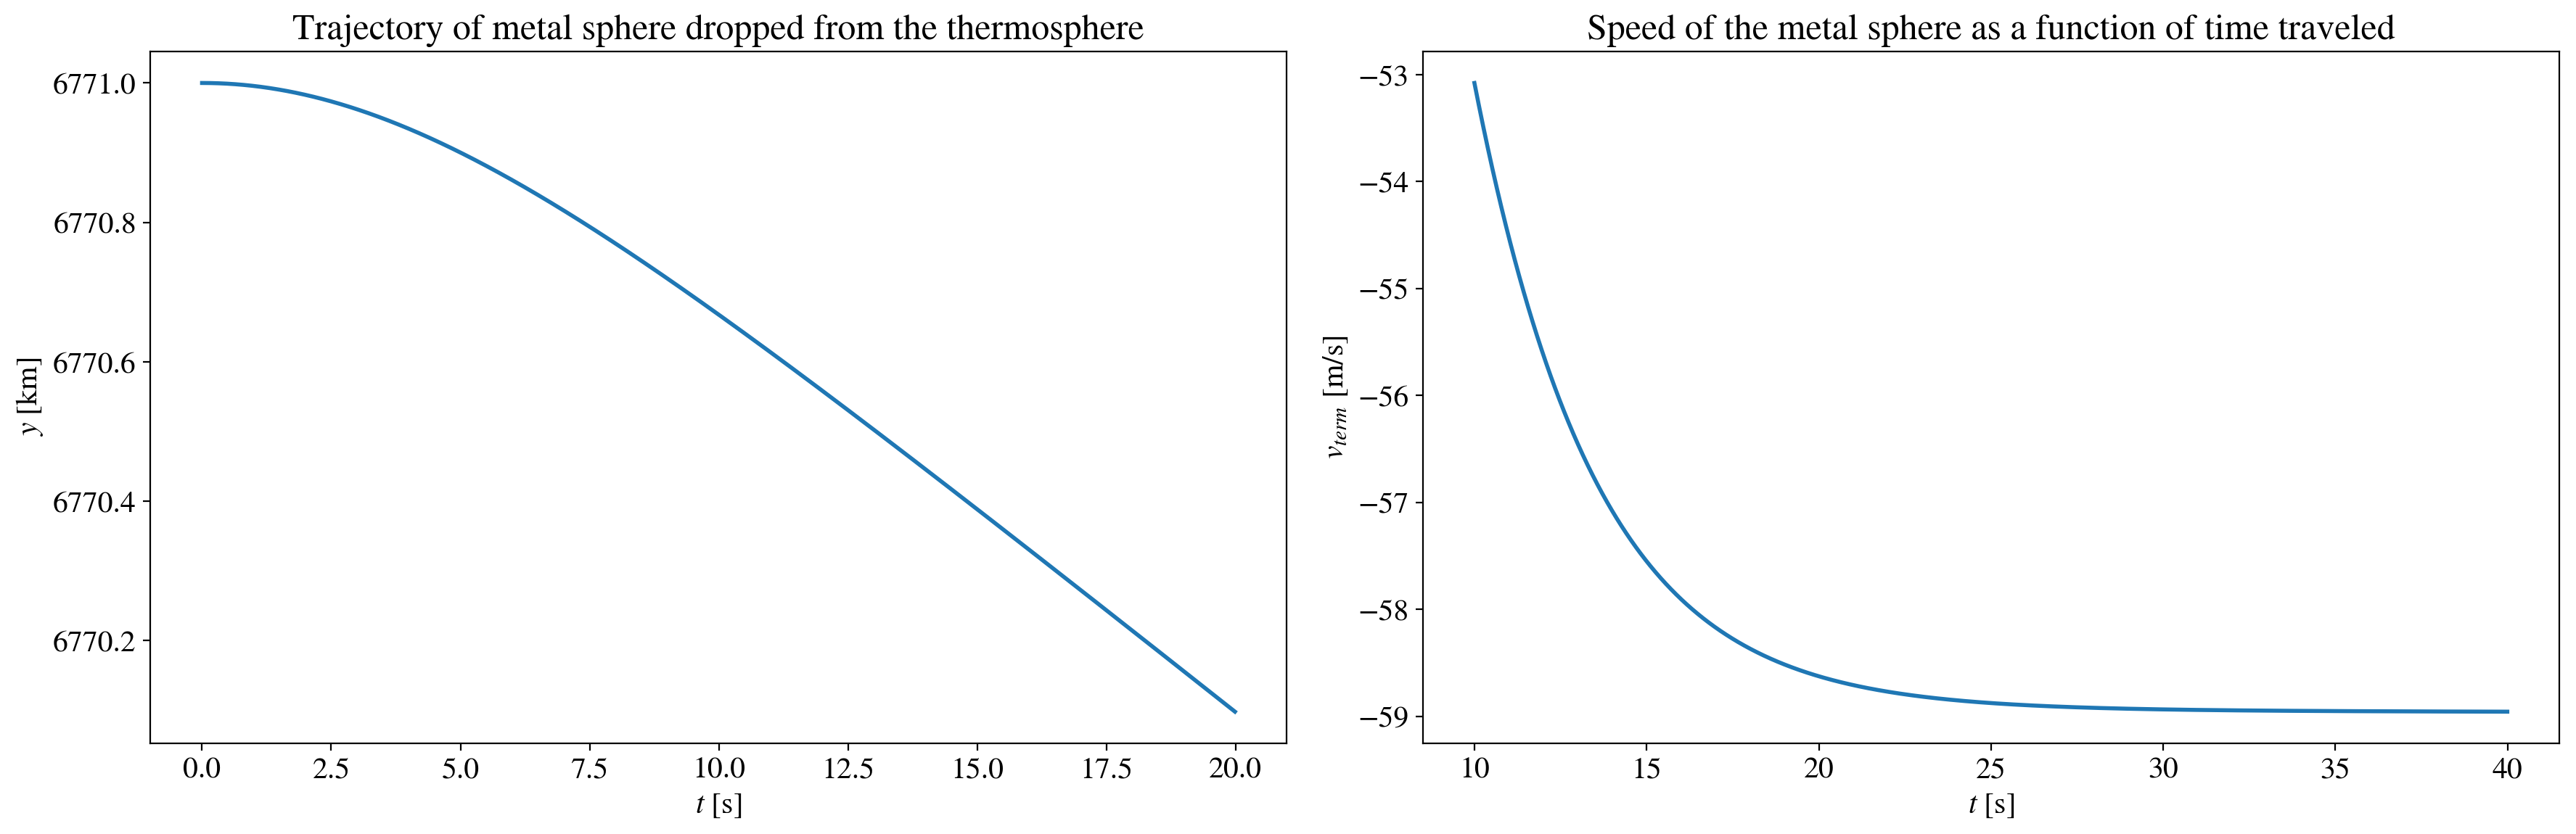

In [10]:
M, t = full_Euler_high(0.01, g, np.array([6771*10**3,0]), 0, 200)

fig = plt.figure(figsize=(18, 6))  # Create figure and determine size

ax1 = plt.subplot(121)
ax1.set_title("Trajectory of metal sphere dropped from the thermosphere")
ax1.set_xlabel(r"$t$ [s]")
ax1.set_ylabel(r"$y$ [km]")
# Only plotting the first twenty seconds of the trajectory, and rescaling y into kilometres
plt.plot(t[:2000], M[0][:2000] / 10 ** 3)

ax2 = plt.subplot(122)
ax2.set_title("Speed of the metal sphere as a function of time traveled")
ax2.set_xlabel(r"$t$ [s]")
ax2.set_ylabel(r"$v_{term}$ [m/s]")
# Plotting the speed as a function of time in the interval [10 s, 20 s] to study how the speed changes
# after the main acceleration at the start of the free fall
ax2.plot(t[1000:4000], M[1][1000:4000])

fig.tight_layout()
plt.show()

We can deem the results produced by Euler's method as valid due to our physical understanding of the problem. On the plot to the right we we can study the speed of the metal sphere as it falls towards the earth. The concept of terminal speed. i.e. when the drag force is equal to the gravitational force, is useful here. We observe that after the initial acceleration, the speed seems to flatten out at around 60 m/s. However, we know that the speed of the sphere should in fact increase even more, as the gravitational pull of the earth will pull stronger as the sphere is towards the center of the earth (remember, gravity scales as $\frac{1}{r^2}$). Let's see if we can observe this effect in our numerical solution.

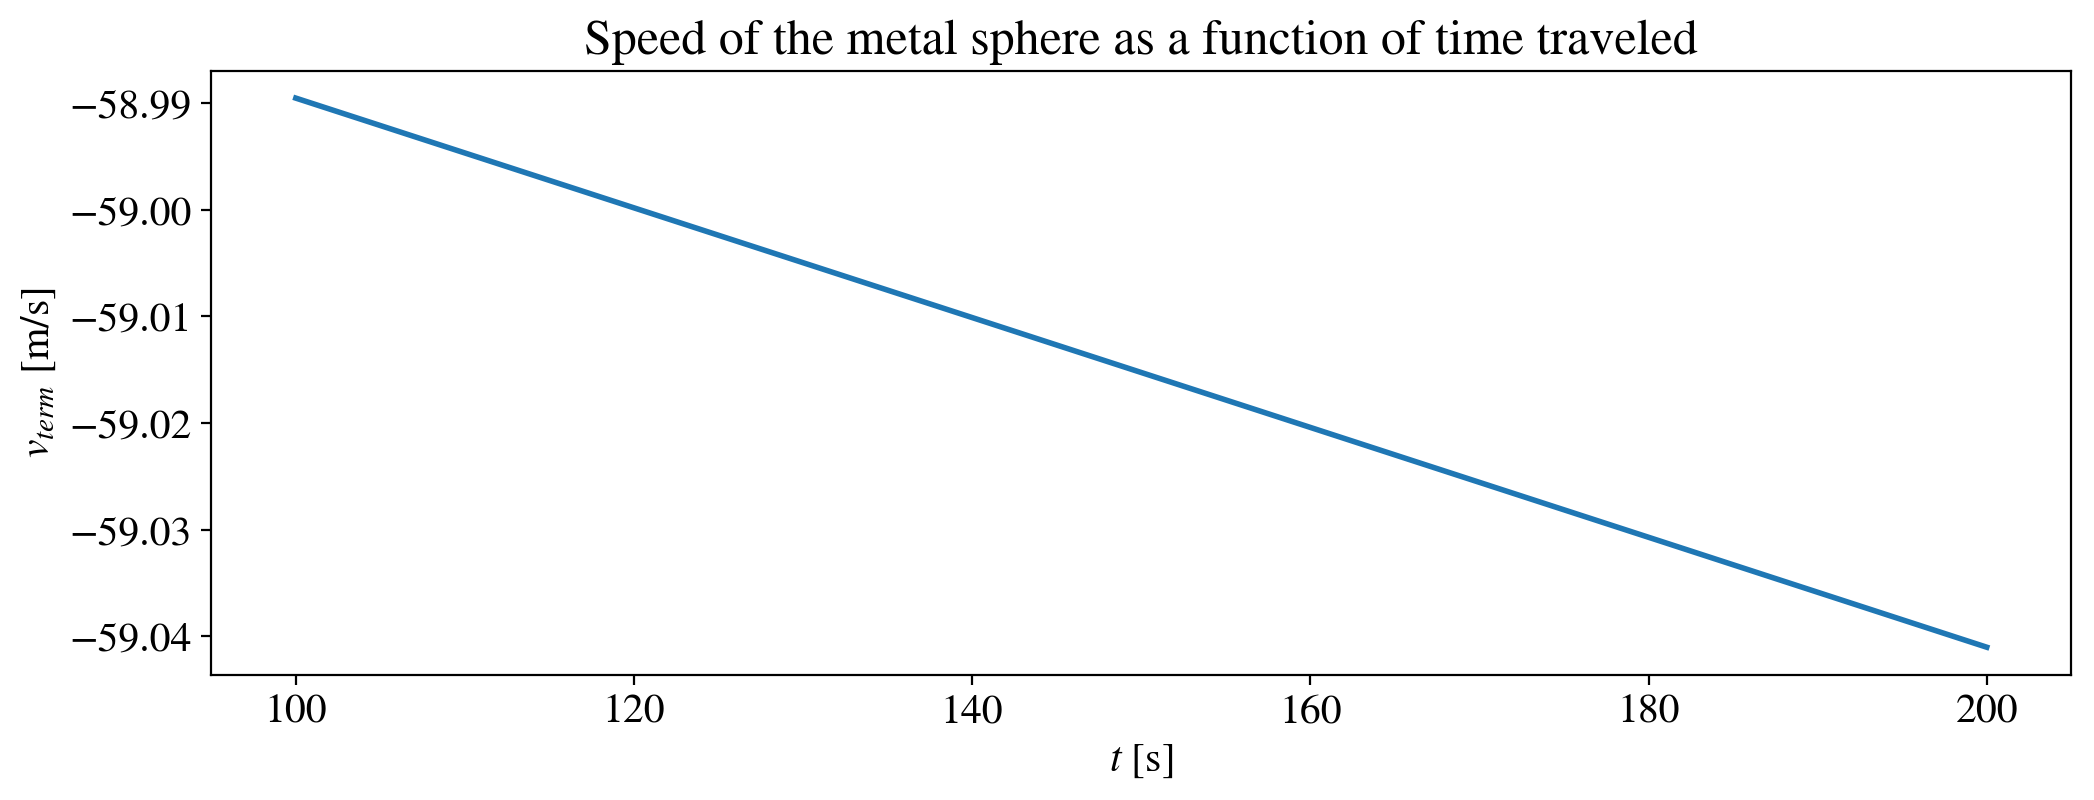

In [11]:
fig = plt.figure(figsize=(12, 4))  # Create figure and determine size
plt.plot(t[10000:], M[1][10000:])
plt.title("Speed of the metal sphere as a function of time traveled")
plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$v_{term}$ [m/s]")
plt.show()

We clearly observe the effect of the increasing gravitational force! For more examples on how to use physical principles to determine the validity of numerical results  (i.e. Energy conservation etc.) check out our notebook on [Projectile motion](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/projectile_motion.ipynb).

## Conclusion
Euler's method is a simple numerical procedure for solving ordinary differential equations, and it's simplicity manifests itself both in the straightforward numerical implementation, but also in the power of the method to solve more complex problems. For more sophisticated problems that are more prone to numerical errors, more powerful methods such as the forth order Runge-Kutta method should be considered instead (This is done in the aforementioned notebook). However, for the simple examples we considered here, it was sufficient!